In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import ticker
from matplotlib import dates as mdates
import datetime

In [3]:
def make_delta(entry):
    h, m, s = entry.split(':')
    return datetime.timedelta(hours=int(h), minutes=int(m), seconds=int(s))

In [4]:
df_original = pd.read_csv('ViewingActivity.csv',index_col=False)
df_original = df_original.sort_values(by='Start Time')
df_original[['Duration']] = df_original[['Duration']].applymap(lambda entry: make_delta(entry))
df = df_original.copy()
df.drop(['Attributes', 'Supplemental Video Type', 'Device Type','Country', 'Bookmark', 'Latest Bookmark'],axis=1,inplace=True)

In [5]:
df_tiago = df[df['Profile Name']=='Tiago'].copy()
df_tiago.drop(['Profile Name'],axis=1,inplace=True)
df_tiago[['Date','Time']] = df_tiago['Start Time'].str.split(' ',n=1,expand=True)
df_tiago[['Show','Season','Episode']] = df_tiago['Title'].str.split(':',n=2,expand=True)


In [6]:
def total_duration(df):
    total_duration = df['Duration'].sum()
    total_hours = total_duration.days * 24 + total_duration.seconds//3600
    total_min = total_duration.days*24*60 + total_duration.seconds//60

    print('Total:',total_duration)
    print('Horas:',total_hours)
    print('Minutos:',total_min)

Total: 1 days 23:01:39
Horas: 47
Minutos: 2821


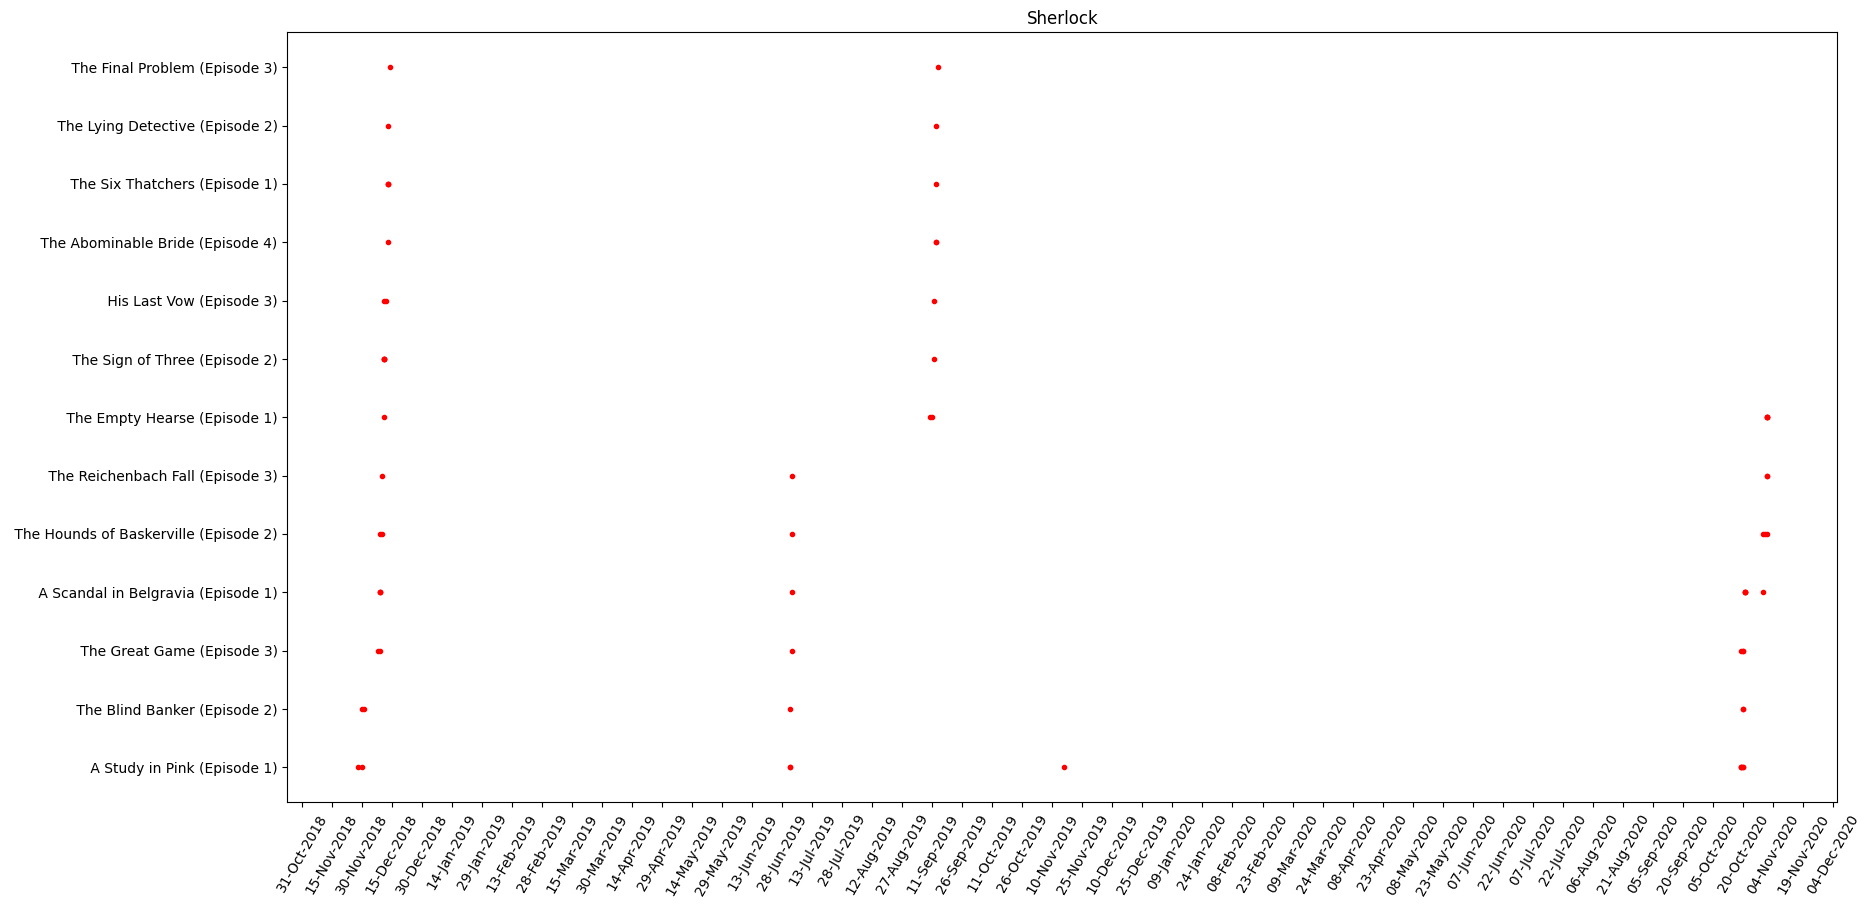

In [7]:
title = 'Sherlock'

df_tiago['Episode'] = df_tiago['Episode'] .replace([None], '')

show = df_tiago[df_tiago['Show'].str.contains(title)].copy()
time = pd.to_datetime(show['Date'].copy())

total_duration(show)


plt.figure(figsize=(20,10))
plt.title(title)
dtFmt = mdates.DateFormatter('%d-%b-%Y')
plt.gca().xaxis.set_major_formatter(dtFmt)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15))
# plt.gca().yaxis.set_major_formatter(plt.MaxNLocator(50))
# plt.ylim(bottom=1)
plt.plot(time, show['Episode'],'ro',markersize=3)
plt.xticks(rotation=60, fontweight='light')
plt.show()



C:\Users\tiago\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


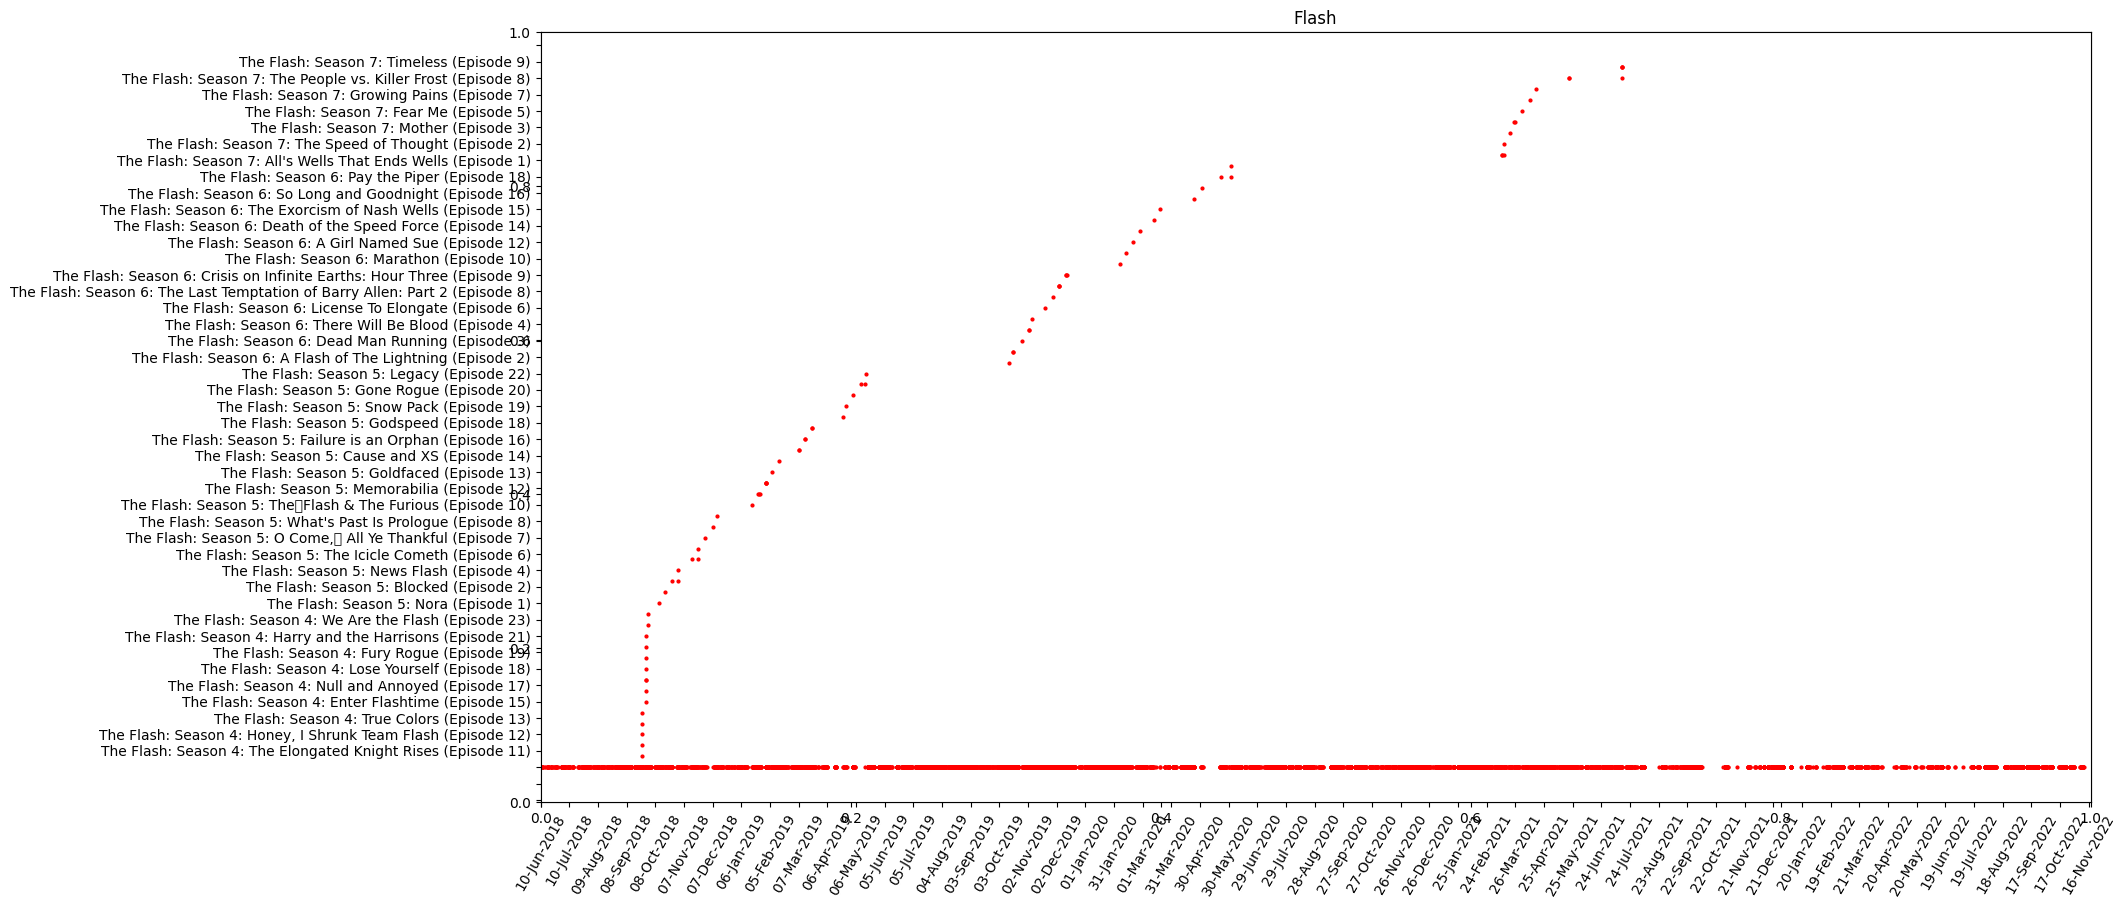

In [8]:
title = 'Flash'

time = pd.to_datetime(df_tiago['Date'].copy())
show = np.where(df_tiago['Show'].str.contains(title), df_tiago['Title'], '')

# duration = np.where(df_tiago['Show'] == title, df_tiago['Duration'],'')

# total_duration(pd.to_datetime(duration))

df_tiago['Episode'] = df_tiago['Episode'] .replace([None], '')


plt.figure(figsize=(20,10))
plt.title(title)
dtFmt = mdates.DateFormatter('%d-%b-%Y')
ax = plt.axes()
plt.gca().xaxis.set_major_formatter(dtFmt)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(50))
# plt.ylim(bottom=1)
plt.plot(time, show,'ro',markersize=2)
plt.xticks(rotation=60, fontweight='light')
plt.xlim([pd.to_datetime('2018-06-10'),pd.to_datetime('2022-11-18')])
# plt.xlim([pd.to_datetime('2019-03-15'),pd.to_datetime('2019-03-22')])
plt.show()

In [9]:
from collections import Counter

Counter(df_tiago['Show'])

print(Counter(df_tiago['Show']).most_common())

[('Friends', 603), ('How I Met Your Mother', 555), ('The Big Bang Theory', 482), ('Brooklyn Nine-Nine', 334), ('Community', 265), ('Lucifer', 230), ('Suits', 228), ('Full House', 218), ('Once Upon a Time', 208), ('Archer', 173), ('Arrow', 161), ('Gotham', 156), ('Superstore', 151), ('Scorpion', 150), ('The Good Place', 149), ('Prison Break', 147), ('Elementary', 136), ('One Day at a Time', 128), ('Arrested Development', 123), ('Family Guy', 120), ('Breaking Bad', 119), ('Seinfeld', 119), ('The 100', 109), ('The Ranch', 106), ('BoJack Horseman', 104), ('Cobra Kai', 103), ('Avatar', 92), ('Riverdale', 90), ('The Flash', 90), ('South Park', 87), ("Grey's Anatomy", 86), ('Money Heist', 73), ('Formula 1', 70), ('Atypical', 69), ('The Last Kingdom', 69), ('Sherlock', 66), ('Unbreakable Kimmy Schmidt', 62), ("DC's Legends of Tomorrow", 61), ('Under the Dome', 59), ('Rick and Morty', 53), ('Titans', 52), ("Marvel's Iron Fist", 48), ('Disenchantment', 47), ('Dark', 45), ('The Umbrella Academy',

In [10]:
# # print(Counter(df_tiago['Date']).elements)
# date = np.asarray(str(df_tiago['Date']))

# count = np.zeros((1085))
# seen = np.zeros((1085))

# i = 0
# j=0
# for each in range(8650):
#     if date[each] == date[each-1]:
#         count[i] +=1
#     else:
#         seen[j-1] = date[each]
#         j+=1
#     i+=1


# # values = np.asarray(Counter(df_tiago['Date']).most_common())

# # values.sort(axis=0)
# # vY = np.zeros((1085))
# # i=0
# # for v in values:
# #     vY[i] = int(v[1])
# #     i+=1

# plt.figure(figsize=(20,7.5))
# dtFmt = mdates.DateFormatter('%Y-%b-%d')
# plt.gca().xaxis.set_major_formatter(dtFmt) 
# plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
# plt.xticks(rotation=90, fontweight='light')
# plt.title('Episodios por dia')
# plt.ylabel('Nº Episódios')
# plt.plot(pd.to_datetime(values[:,0]), vY)

Title: Big Bang
Total: 5 days 06:04:27
Horas: 126
Minutos: 7564
[' Season 1', ' Season 2', ' Season 3', ' Season 4', ' Season 5', ' Season 6', ' Season 7', ' Season 8', ' Season 9', ' Season 10', ' Season 11', ' Season 12', ' Season 1_hook_primary_16x9']


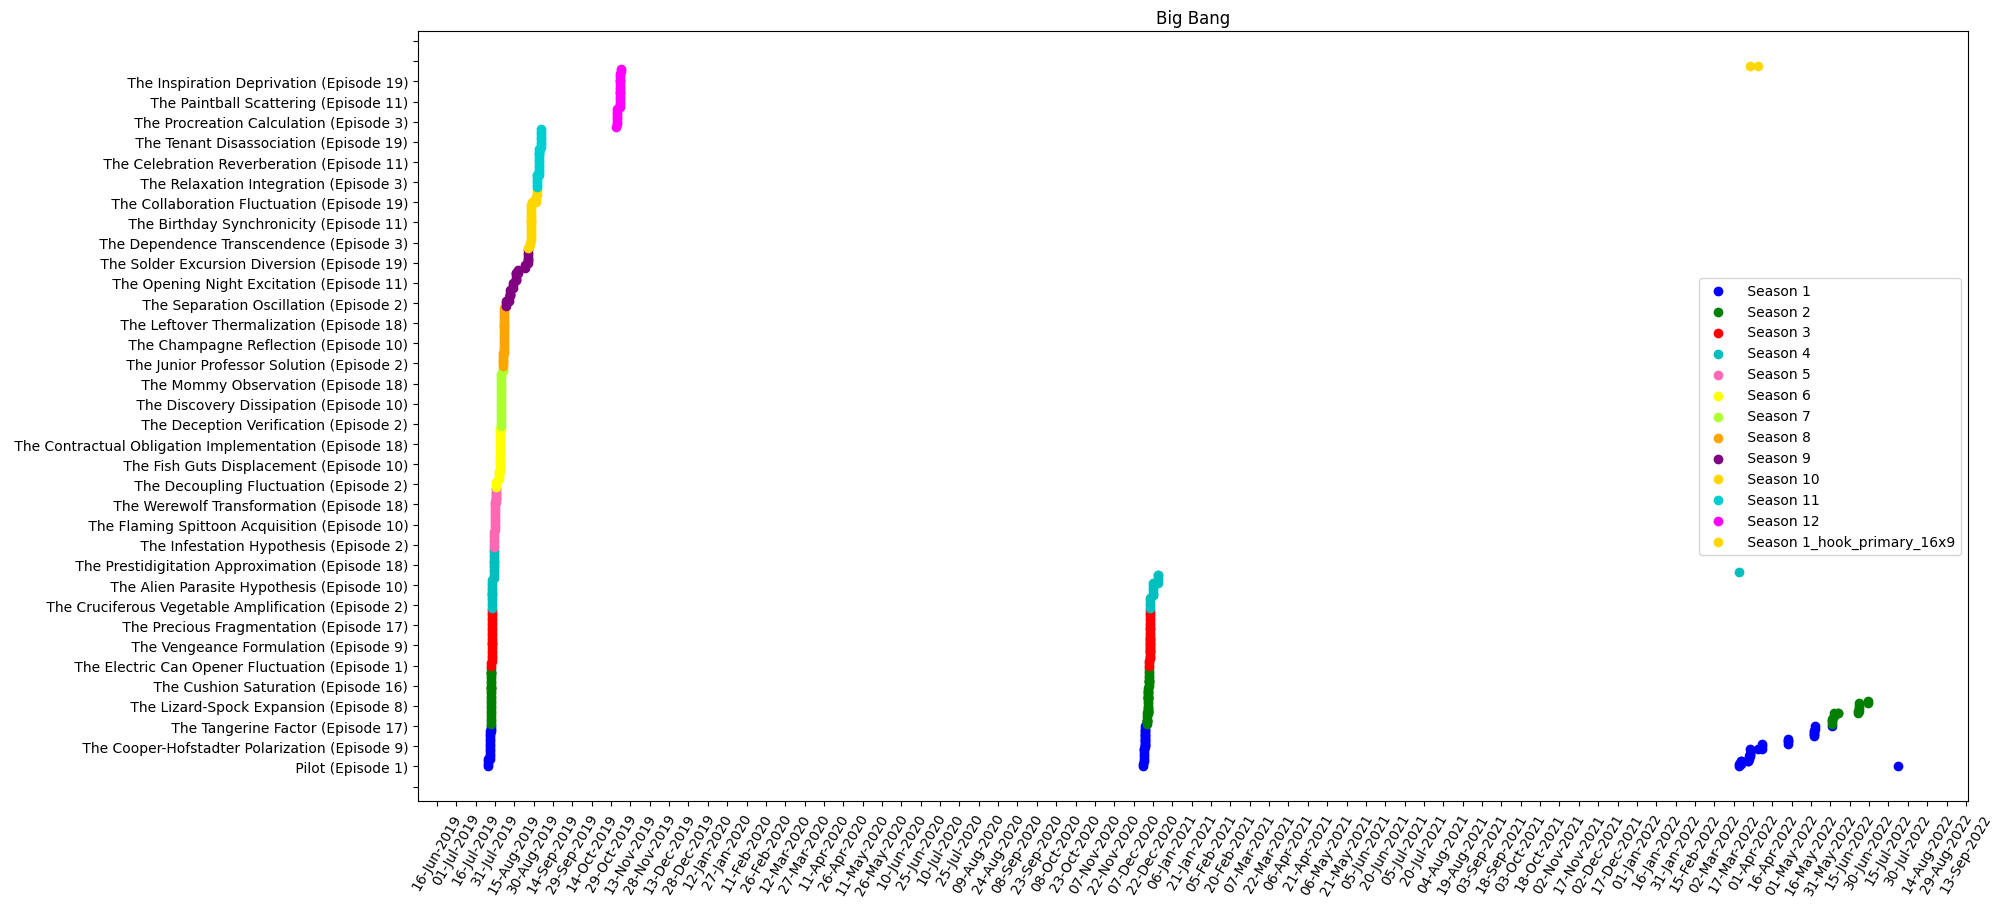

In [11]:
title = 'Big Bang'

df_tiago['Season'] = df_tiago['Season'] .replace([None], '')
df_tiago['Episode'] = df_tiago['Episode'] .replace([None], '')

show = df_tiago[df_tiago['Show'].str.contains(title)].copy()
time = pd.to_datetime(show['Date'].copy())

print('Title:', title)
total_duration(show)

seasons = list()
for s in show['Season']:
    if s != '':
        if s not in seasons:
            seasons.append(s)

print(seasons)

plt.figure(figsize=(20,10))
plt.title(title)
dtFmt = mdates.DateFormatter('%d-%b-%Y')
plt.gca().xaxis.set_major_formatter(dtFmt)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15))
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(50))
plt.xticks(rotation=60, fontweight='light')

colors = ['b', 'g', 'r', 'c','hotpink', 'yellow', 'greenyellow', 'orange','purple', 'gold', 'darkturquoise', 'fuchsia', 'gold']
temps = list()
date = list()
i=0
for temp in seasons:
    for ep,s,d in zip(show['Episode'],show['Season'],show['Date']):
        if s == temp:
            temps.append(ep)
            date.append(d)
    plt.scatter(pd.to_datetime(date), temps,color=colors[i],label=temp)
    temps.clear()
    date.clear()
    i += 1

plt.legend()
plt.show()

Money Heist
Prison Break
The Do-Over
The Rain
The 100
Marvel's Luke Cage
That's My Boy
The Tourist
TAU
Limitless
F is for Family
Archer
The End of the F***ing World
3%
Under the Dome
Paul
Disenchantment
Black Mirror
Stranger Things
When We First Met
Idiocracy
Riverdale
Paradise PD
Magic for Humans
Ultimate Beastmaster Brasil
Ultimate Beastmaster
Lost in Space
BoJack Horseman
BoJack Horseman Christmas Special
American Pie Presents
Arrow
DC's Legends of Tomorrow
The Flash
Atypical
Salvation
Elite
The Package
The Dictator
Marvel's Daredevil
Marvel's Iron Fist
Sherlock
Sick Note
The After Party
Maniac
Ellen DeGeneres
Bird Box
The Girl with All the Gifts
The Last Hangover
Marvel's The Defenders
Big Mouth
Marvel's Jessica Jones
Sex Education
Titans
COMEDIANS of the world
It's Kind of a Funny Story
Brooklyn Nine-Nine
One Day at a Time
The Umbrella Academy
Russian Doll
Isn't It Romantic
Luther
Friends
The Disappearance of Madeleine McCann
The OA
You vs. Wild
Superbad
Lucifer
Mr. Iglesias
Eleme

C:\Users\tiago\AppData\Local\Temp\ipykernel_73260\1325195778.py:18: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  show = df_tiago[df_tiago['Show'].str.contains(each)].copy()


Peaky Blinders
Heist
How to Become a Tyrant
Major Grom
Ragnarok
Tribes of Europa
The Last Mercenary
Designated Survivor
The Seven Deadly Sins
The Walking Dead
Teen Wolf
Creed II
Masters of the Universe
Sons of Anarchy
Close Enough
Marlon
New Amsterdam
Too Hot to Handle
Biohackers
How to Get Away With Murder
Explained
Mamma Mia!
The Mind, Explained
Grace and Frankie
The Witcher
Car Masters
Ali G Indahouse
Squid Game
Malcolm & Marie
Superstore
How Do You Know
The Good Cop (Trailer)
Season 1 Plot Clip
Bohemian Rhapsody
Season 1 Trailer
Supporting Character Clip
Trailer
Inciting Incident Clip
The Blind Side_hook_primary_16x9
SEASPIRACY_CLIP_ACT2CONFLICT
The Bleeding Edge (Trailer)
The Girl Next Door_hook_02_16x9
Men in Black_hook_primary_16x9


C:\Users\tiago\AppData\Local\Temp\ipykernel_73260\1325195778.py:18: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  show = df_tiago[df_tiago['Show'].str.contains(each)].copy()
C:\Users\tiago\AppData\Local\Temp\ipykernel_73260\1325195778.py:18: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  show = df_tiago[df_tiago['Show'].str.contains(each)].copy()


Django Unchained_hook_primary_16x9
The Revenant_hook_primary_16x9
Code 8_hook_01_16x9
Battle
Spectral (Trailer)
Into the Wild_hook_primary_16x9
Jarhead_hook_02_16x9
War Machine (Trailer)
Outlaw King (Trailer)
Operation Finale (Trailer)
Bird Box (Warning)
Spirit
Bright (Trailer)


C:\Users\tiago\AppData\Local\Temp\ipykernel_73260\1325195778.py:18: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  show = df_tiago[df_tiago['Show'].str.contains(each)].copy()
C:\Users\tiago\AppData\Local\Temp\ipykernel_73260\1325195778.py:18: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  show = df_tiago[df_tiago['Show'].str.contains(each)].copy()
C:\Users\tiago\AppData\Local\Temp\ipykernel_73260\1325195778.py:18: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  show = df_tiago[df_tiago['Show'].str.contains(each)].copy()
C:\Users\tiago\AppData\Local\Temp\ipykernel_73260\1325195778.py:18: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  show = d

Season 4 Trailer
Spartacus
The Game Changers_hook_04_16x9
The Game Changers
Alice in Borderland
Limited Series Trailer
The End of the F***ing World (Trailer)
The Big Short_hook_primary_16x9
Plot Clip
100 Humans
Human
The Great Hack (Trailer)


C:\Users\tiago\AppData\Local\Temp\ipykernel_73260\1325195778.py:18: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  show = df_tiago[df_tiago['Show'].str.contains(each)].copy()


SEASPIRACY_CLIP_SUPPORTINGCHARACTER
Roman Empire
Spycraft
Kiss the Ground_hook_01_16x9
Kiss the Ground
Seinfeld
Part 1 Clip Genre Specific Moment
Inside Job
Villain / Antagonist Clip
Season 1 Genre Specific Moment Clip
PARADISEPD_PT3_CLIP_GENRE
Season 1 Informative Clip
Hubie Halloween
Trailer 1
AIB Hook 1
Selling Sunset
Ginny & Georgia
Part 4 Bonus Video 1
3% (Trailer)
Fate
Main Character Intro Clip
The New Legends of Monkey (Trailer)


C:\Users\tiago\AppData\Local\Temp\ipykernel_73260\1325195778.py:18: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  show = df_tiago[df_tiago['Show'].str.contains(each)].copy()
C:\Users\tiago\AppData\Local\Temp\ipykernel_73260\1325195778.py:18: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  show = df_tiago[df_tiago['Show'].str.contains(each)].copy()


Blown Away
La Casa de Papel
La reina del flow
The Queen of Flow
Season 3 Trailer
Clip
Army of the Dead
PROJECTPOWER_CLIP_INCITINGINCIDENT
Elysium_hook_primary_16x9
Trailer 2
Glória
Monty Python and the Holy Grail_hook_primary_16x9
Monty Python and the Holy Grail
The Dirt (Trailer)


C:\Users\tiago\AppData\Local\Temp\ipykernel_73260\1325195778.py:18: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  show = df_tiago[df_tiago['Show'].str.contains(each)].copy()
C:\Users\tiago\AppData\Local\Temp\ipykernel_73260\1325195778.py:18: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  show = df_tiago[df_tiago['Show'].str.contains(each)].copy()


Season 1 Teaser 2
Sense8 (Trailer)
The Mysterious
Don't Look Up
Kim's Convenience
Clip 2
Death to 2021
Pourris gâtés_hook_primary_16x9
The Big Short
Pretty Smart
Season 1 Cliffhanger Clip
Season 3 Recap
Army of Thieves
Sonic Boom
Season 1 Inciting Incident Clip
Battle Bots
Good Girls
Season 1 Trailer 3
The Office (U.S.)
Ozark
After Life
Archive 81
The Blacklist


C:\Users\tiago\AppData\Local\Temp\ipykernel_73260\1325195778.py:18: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  show = df_tiago[df_tiago['Show'].str.contains(each)].copy()


Midnight Asia
I Am Georgina
Sonic the Hedgehog
LEGO
The Spectacular Spider-Man
Love is Blind
Season 1 Recap
Murderville
Inventing Anna
Season 1 Teaser 1
Great News
Season 1 Main Character Intro Clip
Love is Colorblind_hook_03_16x9
Season 2 Character Intro Clip 1
Love Is Blind
The Guardians of Justice
iZombie
Season 2 Genre Specific Moment Clip
Season 4 Sensory Clip
Relatable Clip
Season 1 High Context Clip
Between Two Ferns
Pete Davidson
Have a Good Trip
This Is 40 - Clip 1
Silver Linings Playbook - Clip 1
Jerry Before Seinfeld - Clip 4
Act 2 Conflict Clip
The Adam Project
Battlebots
Bullsh*t The Gameshow
Season 7 Supporting Character Clip 2
Ricky Gervais
Volume 3 Trailer
The Pentaverate
Sonic the Hedgehog_hook_primary_16x9
Season 5 Clip
Floor Is Lava
Season 2 Plot Clip
Season 1 Supporting Character Clip
Genre Specific Moment Clip
The Amazing Spider-Man_hook_primary_16x9
Liar Liar_hook_primary_16x9
8 Mile_hook_primary_16x9
6 Underground_VAR2-RECIPE-3_EDITOR1
In Time_hook_04_16x9
Season

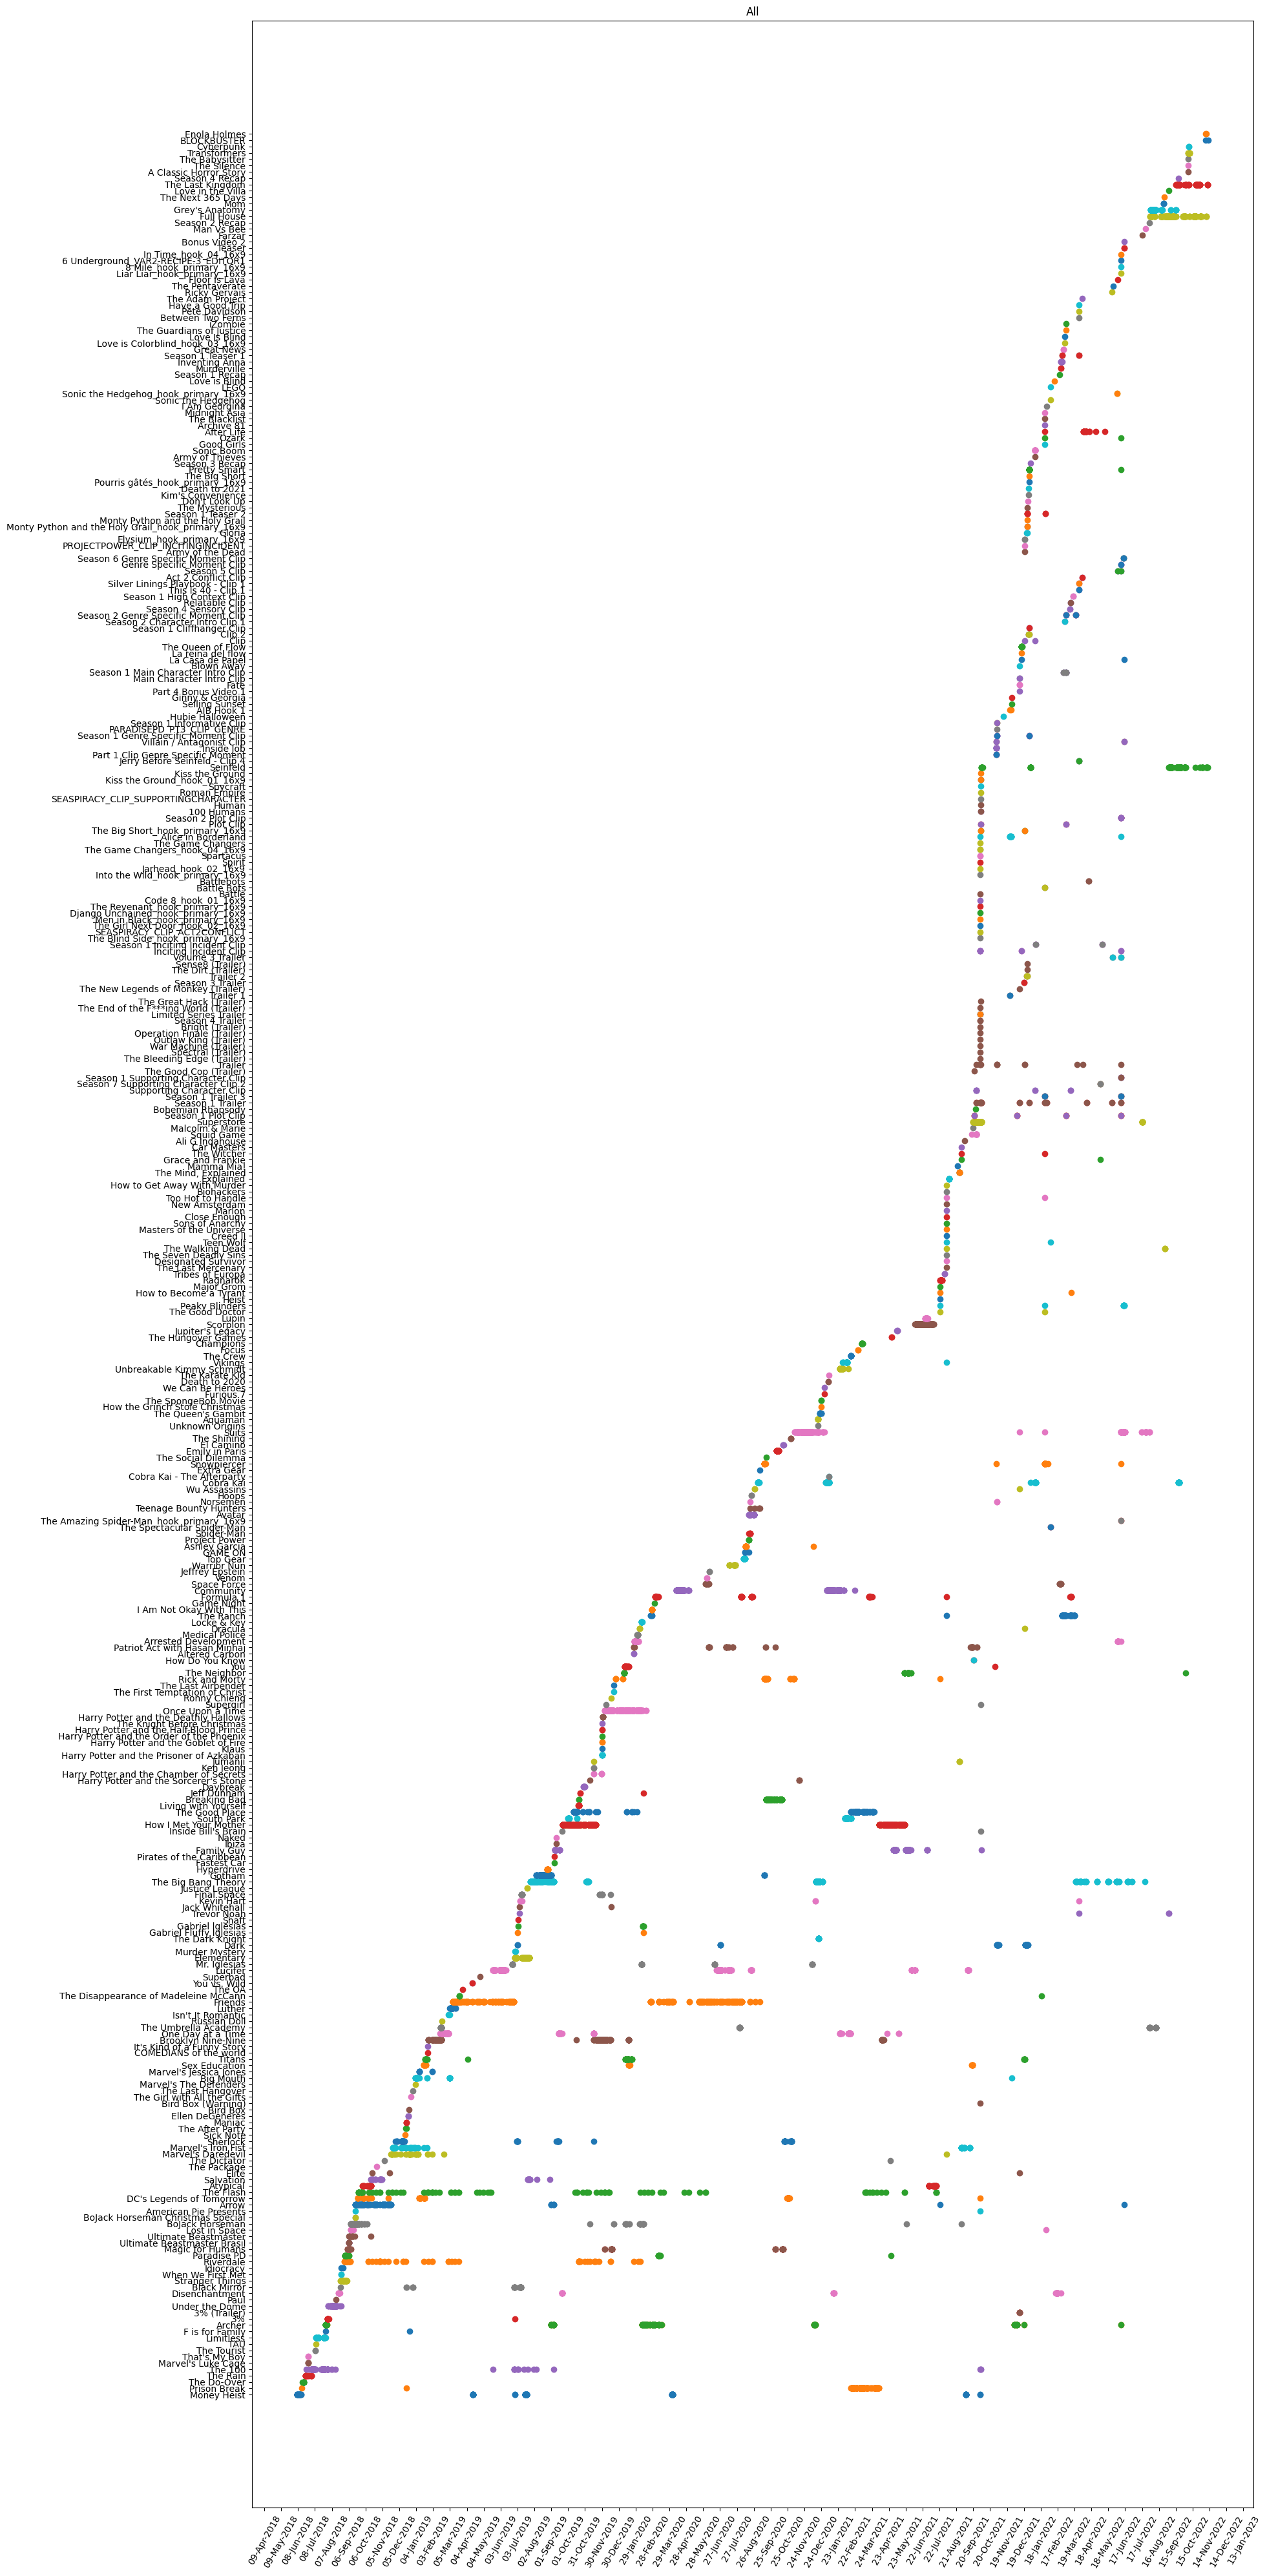

In [23]:
df_tiago['Season'] = df_tiago['Season'] .replace([None], '')
df_tiago['Episode'] = df_tiago['Episode'] .replace([None], '')
df_tiago['Show'] = df_tiago['Show'] .replace([None], '')

shows = list()
for s in df_tiago['Show']:
    if s != '':
        if s not in shows:
            shows.append(s)
# print(shows)

plt.figure(figsize=(20,50))
plt.title('All')

for each in shows:
    print(each)
    try:
        show = df_tiago[df_tiago['Show'].str.contains(each)].copy()
        time = pd.to_datetime(show['Date'].copy())
    except:
        pass
    
    dtFmt = mdates.DateFormatter('%d-%b-%Y')
    plt.gca().xaxis.set_major_formatter(dtFmt)
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
    # plt.gca().yaxis.set_major_locator(plt.MaxNLocator(75))
    plt.xticks(rotation=60, fontweight='light')
    plt.scatter(pd.to_datetime(time), show['Show'],label=each)

plt.show()